# nmi | 2024 spring
## lecture 13 : gaussian quadrature


### 5.5 gaussian quadrature

the precision of quadrature is the degree of its polynomial without error. newton-cotes of degree $n$ has precision $n$ (for $n$ odd) and $n+1$ for (for $n$ even). ie, trapezoid is degree 1, precision one and simpsons is degree 2, precise up to and including third degree polynomials.
</br></br>

newton-cotes achieves these precisions for evenly spaced points. so if quadrature does away with "evenly spaced", what other methods might swap out newton-cotes? does this course not swing between newton and gauss, so guess whos back.
</br></br>

given $n+1$ points, gaussian quadrature has precision $2n+1$, double that of newton.
</br>


[gaussian@wiki](https://en.wikipedia.org/wiki/Gaussian_quadrature)
</br></br>


##### <b><font color=grey>definition 03</font> orthogonal functions</b>


the set of nonzero functions ${p_0,\dots,p_n}$ on interval $[a,b]$ is orthogonal on $[a,b]$ if
</br></br>

\begin{align}
  \int_a^b p_j(x) \text{ }p_k(x) \text{ }dx =
  \left\{
    \begin{array}{cl}
      0 & j\ne k \\
      \ne 0 & j=k.
    \end{array}
  \right.
\end{align}
</br>


##### <b><font color=grey>theorem 04</font></b>


if $\{p_0, p_1,\dots,p_n\}$ is an orthogonal set of polynomials on the interval $[a,b]$, where degree $p_i = i$, then $\{p_0, p_1,\dots,p_n\}$ is a basis for the vector space of degree at most $n$ polynomials on $[a,b]$.
</br>


##### <b><font color=grey>theorem 05</font></b>


if $\{p_0, p_1,\dots,p_n\}$ is an orthogonal set of polynomials on the interval $[a,b]$ and if degree $p_i = i$, then $p_i$ has $i$ distinct roots in the interval $(a,b).
</br>


##### usw


orthogonality defines and solves least squares problems; <b>gaussian quadrature makes use of orthogonal basis sets</b>.
</br>

##### example 13


find a set of three orthogonal polynomials on the interval $[-1,1]$.


easy picks of $p_0(x) = x^0 = 1, p_1(x) = x$ bc
</br></br>

$$\int_{-1}^1 \text{ }1\cdot x \text{ }dx = 0.$$
</br>

$p_2(x) = x^2$ lacks orthogonality with $p_0(x)$,
</br></br>

$$\int_{-1}^1 1\cdot x^2 \text{ }dx = \frac{2}{3} \ne 0.$$
</br>

however, with $p_2(x) = x^2 + c$,
</br></br>

$$\int_{-1}^1 1\cdot (x^2 + c) \text{ }dx = \frac{2}{3} + 2c = 0$$
</br>

where $c = -\frac{1}{3}$. ie, set $\{1,x,x^2 - \frac{1}{3}\}$ is an orthogonal set on $[-1,1]$. and those polynomials are also legendre polynomials.
</br>


##### example 14


###### legendre polynomials

img: [Geek3 - Own work, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=9552813)
</br>

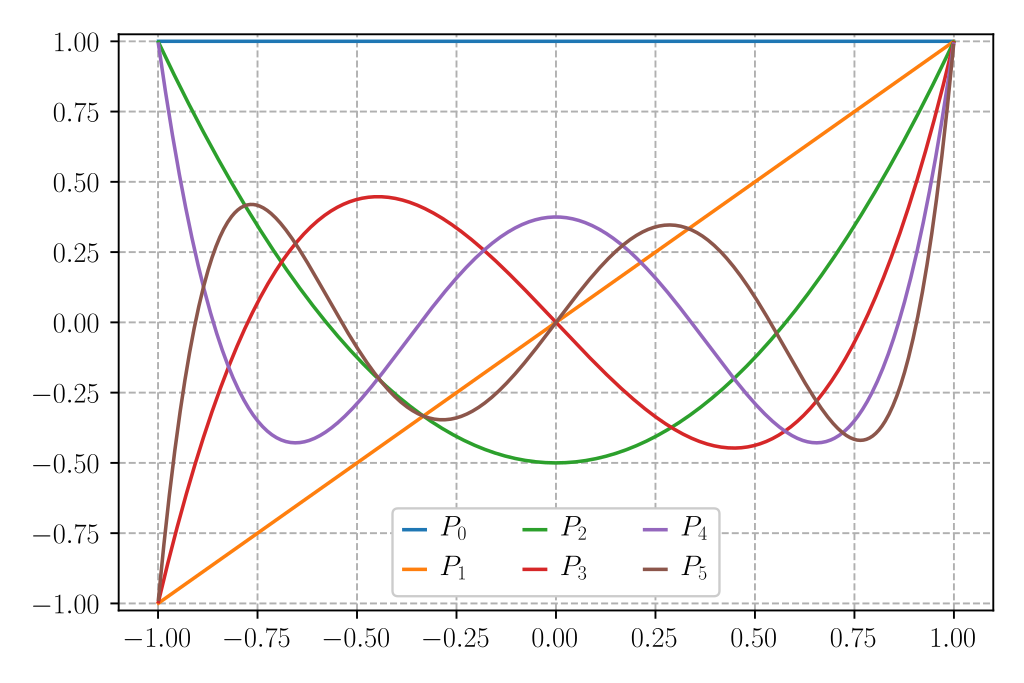

show the set of legendre polynomials
</br></br>

$$p_i(x) = \frac{1}{2^ii!}\frac{d^i}{dx^i}[(x^2-1)^i]$$
</br>

for $0\le i\le n$ is orthogonal on $[-1,1]$.
</br>


note that $p_i(x)$ is degree $i$ polynomial and the $i$th derivative of $(x^2-1)^j$ is divisible by $(x^2-1)$ if $i<j$.
</br></br>

if $i<j$ then
</br></br>

$$\int_{-1}^1 [(x^2-1)^i]^{(i)}[(x^2-1)^j]^{(j)}dx$$
</br>

is zero. integrate by parts with $u=[(x^2-1)^i]^{(i)}$ and $dv=[(x^2-1)^j]^{(j)}dx$.
</br></br>

\begin{align}
uv - \int_{-1}^1 vdu &= \left. [(x^2-1)^i]^{(i)}[(x^2-1)^j]^{(j-1)} \right|_{-1}^1 - \int_{-1}^1 [(x^2-1)^i]^{(i+1)}[(x^2-1)^j]^{(j-1)}dx \\
&= - \int_{-1}^1 [(x^2-1)^i]^{(i+1)}[(x^2-1)^j]^{(j-1)}dx
\end{align}
</br>

bc $[(x^2-1)^j]^{(j-1)}$ divisible by $(x^2-1)$. after $i+1$ repetions of integration by parts,
</br></br>

$$(-1)^{i+1} \int_{-1}^1 [(x^2-1)^i]^{(2i+1)}[(x^2-1)^j]^{(j-i-1)}dx = 0$$
</br>

bc $(2i - 1)^i$ is zero. lol?
</br></br>



$n$th legendre polynomial has $n$ roots $x_1,\dots,x_n$ in $[-1,1]$. guassian quadrature of a function is a linear combination of functions evaluated at legendre roots. ie, approximate the integral of the desired function by the intergral of the interpolating polynomial -- whose nodes are legendre roots.
</br></br>

ie, choose $n$ and let $Q(x)$ be the interpolating polynomial for $f(x)$ at nodes $x_1,\dots,x_n$. using lagrange,
</br></br>

$$Q(x) = \sum_{i=1}^n L_i(x)f(x_i), \quad L_i(x) = \frac{(x-x_1)\dots(x-x_i)\dots(x-x_n)}{(x_i-x_1)\dots(x_i-x_i)\dots(x_i-x_n)}.$$
</br>

integrating results in the following approximation.
</br>


##### <b>gaussian quadrature</b>


$$\int_{-1}^1 f(x)dx \approx \sum_{i=1}^n c_if(x_i), \quad c_i = \int_{-1}^1 L_i(x)dx, i = 1,\dots,n.$$
</br>


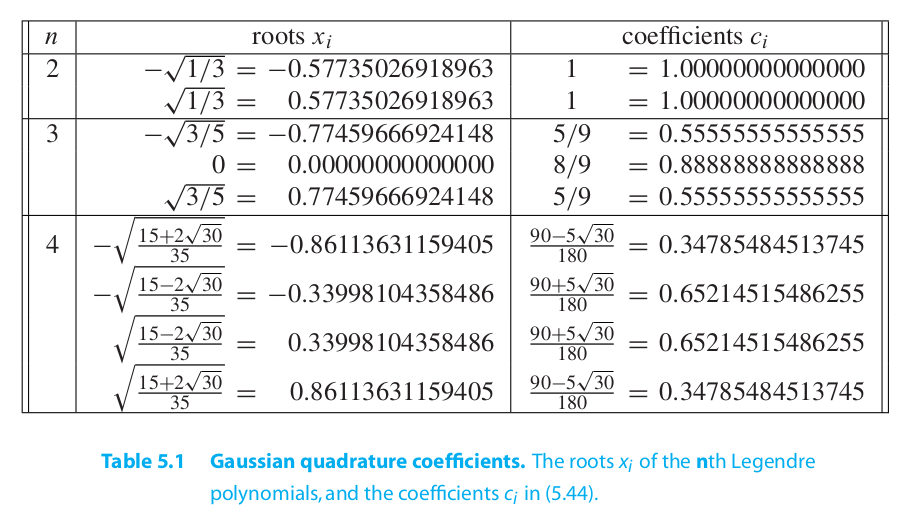

yes, there are old-fashioned tables for $c_i$!
</br>


[quadrature@scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html)


##### example 15


approximate $\int_{-1}^1 e^{\frac{x^2}{2}}dx$ using gaussian quadrature.
</br></br>

\begin{align}
n=2 \quad &\approx \quad c_1f(x_1) + c_2f(x_2) = 1\cdot f(-\sqrt{\frac{1}{3}}) + 1\cdot f(\sqrt{\frac{1}{3}}) \\
n=3 \quad &\approx \quad c_1f(x_1) + c_2f(x_2) + c_3f(x_3) = \frac{5}{9}\cdot f(-\sqrt{\frac{3}{5}}) + \frac{8}{9}\cdot f(0) + \frac{5}{9}\cdot \sqrt{\frac{5}{9}}) \\
n=4 \quad &\approx \quad c_1f(x_1) + c_2f(x_2) + c_3f(x_3) + c_4f(x_4) = \frac{90-5\sqrt{30}}{180} \cdot f(-\sqrt{\frac{15+2\sqrt{30}}{35}}) + \dots
\end{align}
</br>

compare code results below for gaussian quadrature (at $n=4$ function evaluations) with romberg fixed step $R_{3,3}$ (which requires 5 function evaluations).


###### code


In [ ]:
import numpy as np
from scipy import integrate
from scipy.special import erf

a = -1.
b = 1.
f_eg = lambda x: np.exp(-pow(x,2)/2.)

# gaussian quadrature, fixed order
# fixed order, same as above
s_gq,egq = integrate.fixed_quad(f_eg,a,b,n=4) # degree 4
print(f"gaussian quadrature {s_gq}\n")

# romberg, fixed step h
d = 4
h = (b-a)/d
x = np.linspace(a,b,d+1)
y = f_eg(x)
integrate.romb(y,dx=h,show=True)
print() # display spacing

# gaussian ~ more flexible routine, used for benchmark
#s_gq,e_gq = integrate.quadrature(f_eg,a,b,maxiter=4)
s_gq,e_gq = integrate.quadrature(f_eg,a,b)
print(f"benchmark {s_gq}\n")

# romberg ADAPTIVE ~ unnecessary for demo but interesting!
#r_am = integrate.romberg(f_eg,a,b,show=True)

gaussian quadrature 1.7112245045994898

Richardson Extrapolation Table for Romberg Integration
 1.21306 
 1.60653  1.73769 
 1.68576  1.71217  1.71047 

benchmark 1.7112487840123753



##### usw: why do the gaussian quadrature roots work so well?


##### <b><font color=grey>theorem 06</font></b>


gaussian quadrature using the $n$ degree legendre polynomial on $[-1.1]$ has precision $2n-1$.
</br>


###### proof

let $P(x)$ be polynomial of degree at most $2n-1$. show it is integrated exactly by gaussian quadrature.
</br></br>

by long division,
</br></br>

$$P(x) = S(x)p_n(x) + R(x)$$
</br>

where $S(x)$ and $R(x)$ are polynomials of degree less than $n$. gaussian quadrature will be exact on $R(x)$ bc it integrates the interpolating polynomial of degree $n-1$, which is identical to $R(x)$.
</br></br>

at the roots $x_i$ of the $n$th legendre polynomial, $P(x_i) = R(x_i)$, since $p_n(x_i) = 0$ for all $i$. this implies their gaussian quadrature approximations will be the same. their integrals are also identical.
</br></br>

$$\int_{-1}^1 P(x)dx = \int_{-1}^1 S(x)p_n(x)dx + \int_{-1}^1 R(x)dx = 0 + \int_{-1}^1 R(x)dx$$
</br>

by theorem 5.4, $S(x)$ can be written as a linear combination of polynomials of degree less than $n$, which are orthogonal to $p_n(x)$. since gaussian quadrature is exact on $R(x)$, it must also be for $P(x)$. $\blacksquare$

also, to approximate integrals on a general $[a,b]$, translate it back to $[-1,1]$. eg, $t = \frac{(2x-a-b)}{(b-a)}$ such that
</br></br>

$$\int_a^b f(x)dx = \int_{-1}^1 f\left( \frac{(b-a)\cdot t + b + a}{2} \right) \frac{b-a}{2}dt$$